In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading the data from csv file to a pandas Dataframe
insurance_dataset = pd.read_csv("insurance.csv")

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# Getting information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical features:
- sex 
- smoker 
- region

In [6]:
# Checking the null values or missing values

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analaysis 

In [7]:
# Statistucal measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 700x700 with 0 Axes>

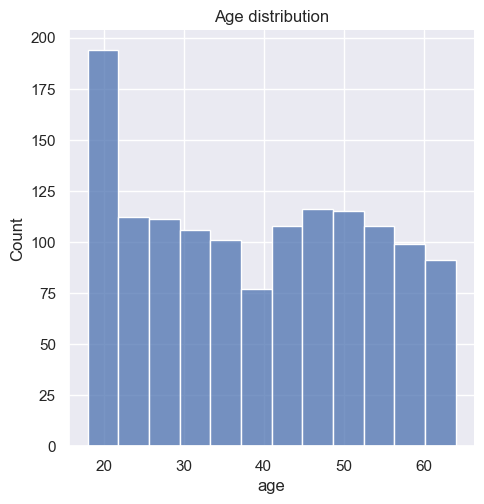

In [8]:
# Distribution of age value
sns.set()
plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['age'])
plt.title("Age distribution")
plt.show()

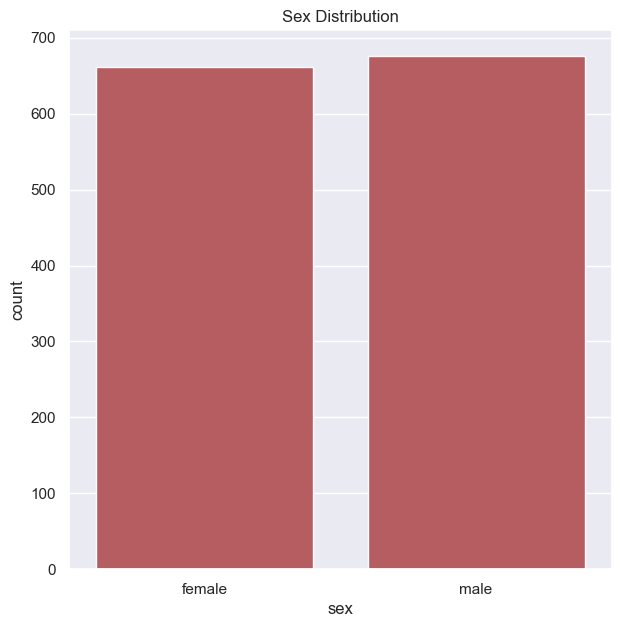

In [9]:
# Gender column
plt.figure(figsize=(7,7))
sns.countplot(x='sex', data=insurance_dataset, color='r')
plt.title("Sex Distribution")
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [11]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Figure size 600x600 with 0 Axes>

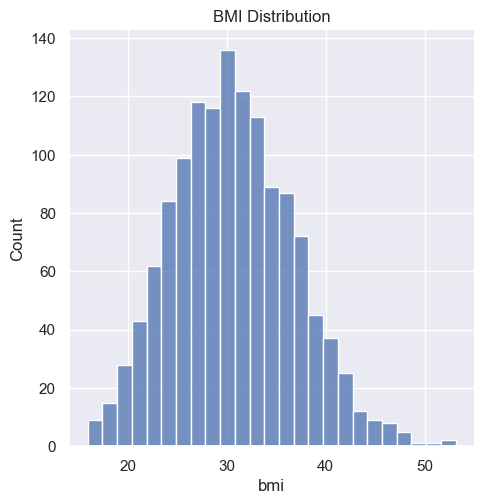

In [12]:
# Distribution of BMI
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

In [13]:
insurance_dataset['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Figure size 700x700 with 0 Axes>

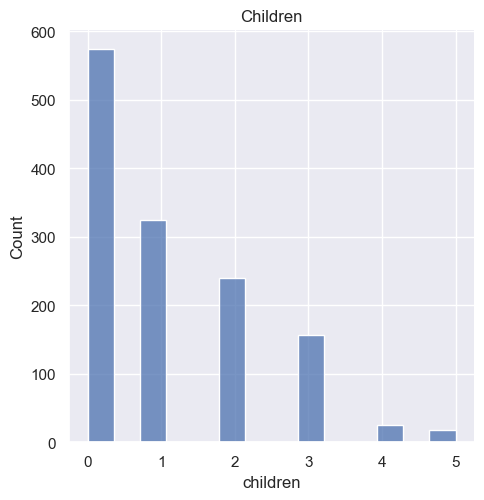

In [14]:
# Children column
plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['children'])
plt.title('Children')
plt.show()


In [15]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

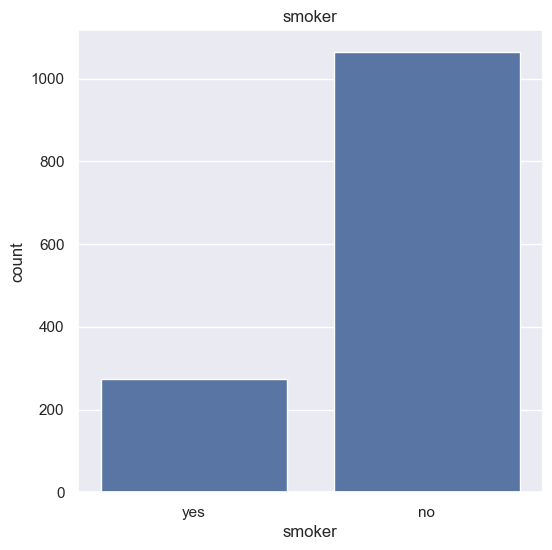

In [16]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

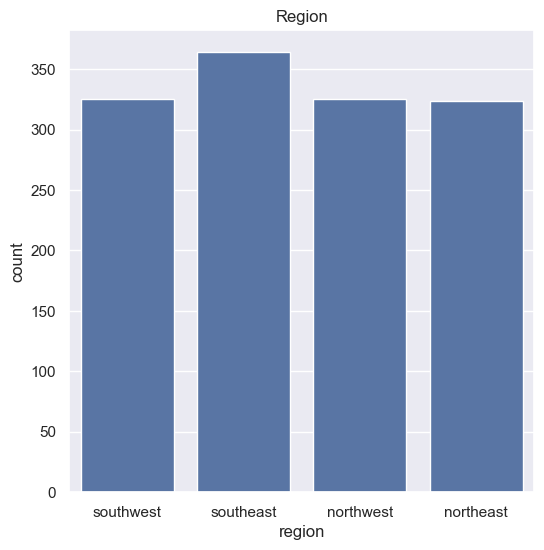

In [18]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

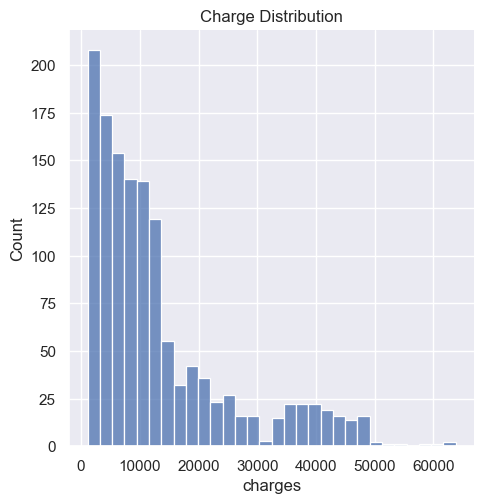

In [20]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title("Charge Distribution")
plt.show()

# Data Pre-processing

Encoding the Categorical feature


In [21]:
# Encoding the sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# ENcoding the 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1 ,'northeast':2, 'northwest':3}}, inplace=True)

 

/var/folders/qb/y15c8p3j2v5122w7hy2sn6g80000gn/T/ipykernel_50777/3363093831.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
/var/folders/qb/y15c8p3j2v5122w7hy2sn6g80000gn/T/ipykernel_50777/3363093831.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
/var/folders/qb/y15c8p3j2v5122w7hy2sn6g80000gn/T/ipykernel_50777/3363093831.py:8: FutureWarning: Downcasting behavior in `replace` is depr

In [22]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [23]:
# Spllitting the features and Target
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [24]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
print(x.shape, x_train.shape, x_test.shape )

(1338, 6) (1070, 6) (268, 6)


# Model Training

- Linear Regression

In [27]:
#Loading the linear Regression model

regressor = LinearRegression()

In [28]:
regressor.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [29]:
# Prediction on training data
training_data_prediction = regressor.predict(x_train)

In [30]:
# R squared value
r2_train =metrics.r2_score(y_train, training_data_prediction)
print('R Squared value:', r2_train) 

R Squared value: 0.751505643411174


In [31]:
# Prediction on test data
test_data_prediction = regressor.predict(x_test)

In [32]:
# R squared value
r2_test =metrics.r2_score(y_test, test_data_prediction)
print('R Squared value:', r2_test) 

R Squared value: 0.7447273869684077


# Building the predictive system
 

In [35]:
input_data  = (31,1,25.74,0,1,0)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is USD", prediction[0])


[3760.0805765]
The insurance cost is USD 3760.0805764960423


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
import pandas as pd

input_data = (31, 1, 25, 0.74, 0, 1)
columns = regressor.feature_names_in_  # Get the feature names used during training

input_df = pd.DataFrame([input_data], columns=columns)
prediction = regressor.predict(input_df)

print("The insurance cost is USD", prediction[0])


The insurance cost is USD 28085.12944282066
